<a href="https://colab.research.google.com/github/kalyan1649/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

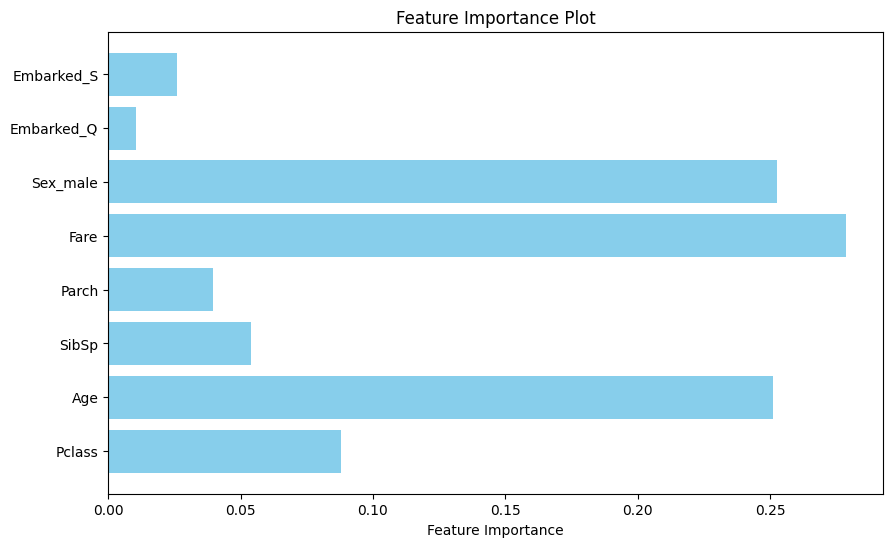

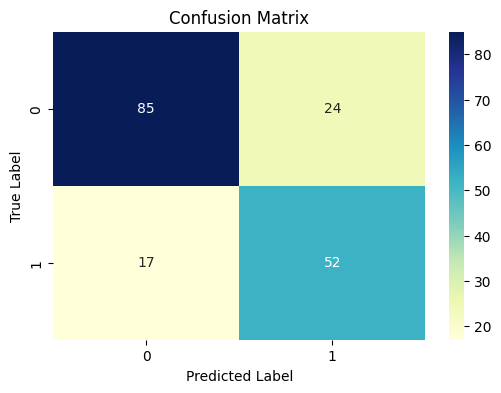

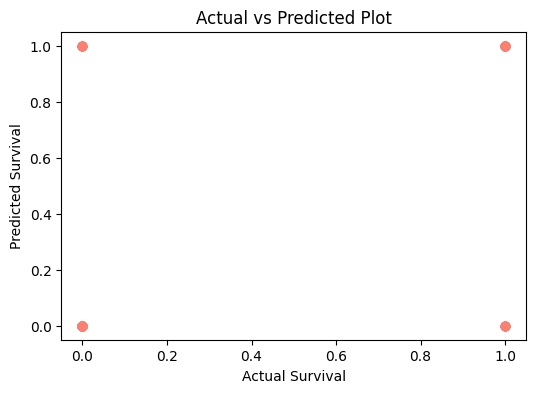

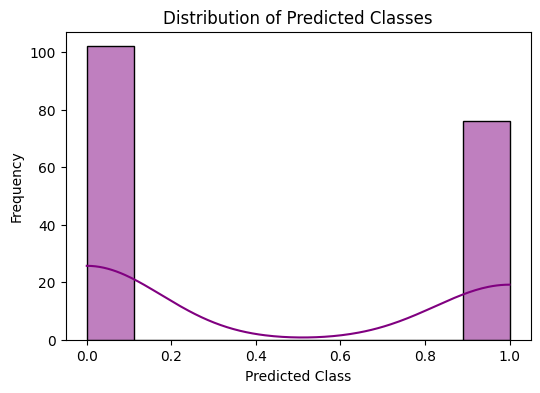

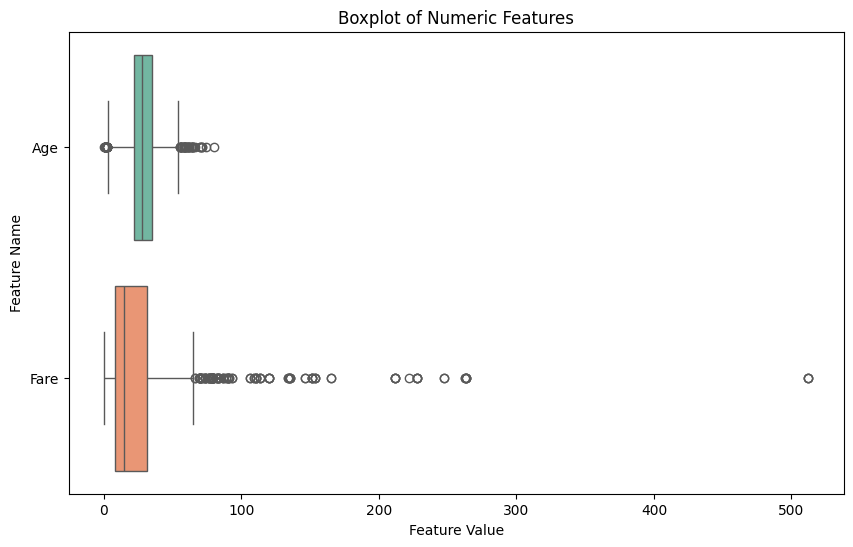

Accuracy: 0.7696629213483146


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Preprocess the data
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.dropna(inplace=True)

# Encode categorical variables
titanic = pd.get_dummies(titanic, drop_first=True)

# Split the dataset into features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot 1: Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_clf.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()

# Plot 2: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot 3: Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='salmon')
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.title("Actual vs Predicted Plot")
plt.show()

# Plot 4: Distribution of Predicted Classes
plt.figure(figsize=(6, 4))
sns.histplot(y_pred, kde=True, color='purple')
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Classes")
plt.show()

# Plot 5: Boxplot of Numeric Features
numeric_features = ['Age', 'Fare']
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic[numeric_features], orient="h", palette='Set2')
plt.xlabel("Feature Value")
plt.ylabel("Feature Name")
plt.title("Boxplot of Numeric Features")
plt.show()

print(f"Accuracy: {accuracy}")
